# Home Assignment No. 3: Part 1 

In this part of the homework you are to solve several problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

In [1]:
import numpy as np
import pandas as pd

import torch

%matplotlib inline
import matplotlib.pyplot as plt

<br>

# Bayesian Models. GLM

## Task 1 (1 pt.)

Consider a univariate(one-dimensional) Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**

References:
 - Bishop - Pattern Recognition And Machine Learning - Springer  2006  ch 2.3.6
 - https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf


$$
\mathcal{N}(\mu| \mu_0, (\beta \tau)^{-1}) 
= {\sqrt{\frac{\beta \tau}{2\pi}}} \exp \left(-\frac{(\mu-\mu_0)\beta\tau(\mu-\mu_0)}{2}\right) \text{ , }$$
$$
Gamma(\tau; a, b) 
= \frac{b^a\tau^{a-1} \exp \left(-b \tau \right) }{\Gamma (a)}
$$

Bayes' theorem: $$
p(\mu, \tau |x)={\frac {p(x|\mu, \tau )p(\mu, \tau )}{p(x)}} = {\frac {p(x| \mu, \tau )p(\mu, \tau )}{p(x)}}
$$

Likelihood: 
$$ p(X|\mu, \tau) = \prod_{i=1}^{n} \sqrt{\frac{\tau}{2\pi}} \exp\left(\frac{-\tau(x_i-\mu)}{2}\right)  = \\
=\frac{1}{(2\pi)^{n/2}}\tau^{n/2} \exp \left( -\frac{\tau}{2}\sum_{i=1}^{n} (x_i - \mu)^2 \right)=\\=
\frac{1}{(2\pi)^{n/2}}\tau^{n/2} \exp \left( - \frac{\tau}{2} \left[ \sum x_i^2 + 2\mu \sum x_i - n \mu^2\right] \right)$$

Prior:

$$ p(\mu, \tau) = NG (\mu, \tau | \mu_0, \beta, a,b)= \mathcal{N}(\mu | \mu_0, (\beta \tau)^{-1}) \otimes \text{Gamma}(\tau| a, b)=\\= \frac{1}{Z} \tau^{1/2} \exp{\left( -\frac{\beta\tau}{2}(\mu - \mu_0)^2 \right)} \tau^{a-1} \exp{\left( -b \tau \right)}$$

Posterior:

$$ p( \mu, \tau | X) \propto  p(X|\mu, \tau) p(\mu, \tau) \propto \tau^{1/2} \exp{\left( -\frac{\beta\tau}{2}(\mu - \mu_0)^2 \right)} \tau^{a-1} \exp{\left( -b \tau \right)} \times \tau^{n/2} \exp \left( - \frac{\tau}{2} \left[ \sum x_i^2 + 2\mu \sum x_i - n \mu^2\right] \right) \propto \\ \propto \tau^{1/2}  exp{ \left( -\frac{\tau}{2} \left[ \beta (\mu^2 - 2\mu \mu_0 + \mu_0^2)+\sum x_i^2 - 2\mu \sum x_i+n\mu^2 \right] \right) } \tau^{n/2+a-1} \exp{} \left( -b\tau \right)\propto \\ \propto
\tau^{1/2} exp{\left( -\frac{\tau}{2} \left[ (\beta + n)\left( \mu - \frac{\beta \mu_0 + \sum x_i}{\beta + n}\right)^2\right]\right)}\tau^{n/2+a-1} exp{\left( -A\tau \right)}$$

where $$A = b + \frac{(\beta + n)\sum x_i^2 + n\beta\mu_0^2 - \left( \sum x_i \right)^2 - 2\beta \mu_0 \sum x_i}{2(\beta+n)}$$

$ \Rightarrow $ 
$$p(\mu, \tau |X) = NG(\mu, \tau| \mu^{'} , \beta ^{'}, a^{'}, b^{'})$$,where 
$$\mu^{'} = \frac{\beta \mu_0 + \sum x_i}{\beta + n}\\
\beta ^{'} = \beta +n \\
a^{'} = a + \frac{n}{2}\\
b^{'} = A$$

we use  $\propto$ because don't care about constant from normalization constant to be distribution density

**END Solution**

## Task 2 (1 + 1 + 1 = 3 pt.)

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

### Task 2.1 (1 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

In [1]:
import numdifftools as nd
from scipy.optimize import minimize
import numpy as np
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
### BEGIN Solution
x = np.array([2/3, 1/6, 1/6])
cov = np.array([[1, -0.25, 0.75],
                [-0.25, 1, 0.5],
                [0.75, 0.5, 2]])
func = lambda w: -multivariate_normal.pdf(w,[0,0,0],cov)/(1+np.exp(-w@x))
log = lambda w: multivariate_normal.logpdf(w,[0,0,0],cov) - np.log(1+np.exp(-w@x))

w_0 = minimize(func, [0,0,0], method='Nelder-Mead').x
hess = nd.Hessian(log)
A = np.linalg.inv(-hess(w_0))

result = (2*np.pi)**(3/2)* np.linalg.det(A)**(1/2)*(-func(w_0))
print(result)

0.49791984101882186


### Task 2.2 (1 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [3]:
import torch
from torch.autograd import Variable, grad

In [4]:
### BEGIN Solution
x_t = Variable(torch.from_numpy(x.reshape(3,1)).type(torch.FloatTensor))
cov_t = Variable(torch.from_numpy(cov).type(torch.FloatTensor))

func_t = lambda z: torch.exp(-0.5 * torch.mm(torch.mm(z.t(),cov_t.inverse()),z)) * torch.sigmoid(torch.mm(z.t(), x_t))
log_t = lambda z: torch.log(func_t(z))

tol, max_iter, learn_rate = 1e-3, 10000, 1e-1

theta = Variable(torch.randn(3,1).type(torch.FloatTensor), requires_grad=True)
for i in range(max_iter):
    y = log_t(theta).backward()
    theta.data += learn_rate * theta.grad.data
    if torch.norm(theta.grad.data) < tol:
        break      
    theta.grad.data.zero_()
theta_0 =  theta.data.numpy()

theta = Variable(torch.FloatTensor(theta_0), requires_grad=True)
y = log_t(theta)
grad_params = torch.autograd.grad(y, theta, create_graph=True)
hess_t = np.diag([torch.autograd.grad(grad_params[0][j],theta,\
                                      create_graph=True)[0].data.numpy()[j][0] for j in range(3)])

det_t = - np.linalg.det(hess_t)
const = np.sqrt((2*np.pi)**3 * np.linalg.det(cov))
result_t = func_t(Variable(torch.FloatTensor(theta_0))).data.numpy()[0][0]/ const* np.sqrt((2*np.pi)**3/det_t) 
print (result_t)
### END Solution

0.2964300391840083


### Task 2.3 (1 pt.)

Compare the results comparing the `absolute errors` of the results (this is possible with Monte-Carlo estimate of the integral). Write 1-2 sentences in the results discussion.

In [5]:
def Monte_Carlo(N):
    return np.mean(1/(1+np.exp(-multivariate_normal.rvs([0,0,0], cov, size=N)@x)))

In [6]:
result_mc = Monte_Carlo(1000000)

In [7]:
print('Relative error, 1 case = {:.3f}'.format(np.abs(result-result_mc)/result_mc))
print('Relative error, 2 case = {:.3f}'.format(np.abs(result_t-result_mc)/result_mc))

Relative error, 1 case = 0.004
Relative error, 2 case = 0.407


As we use diagonal approximation of hessian  the used number of components of matrix is reduced and we loss information about matrix. And finally, it increases relatice error.

<br>

# Gaussian Processes

## Task 3 (1 + 2 = 3 pt.)

### Task 3.1 (1 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertible, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**
$$\left( {\begin{array}{rr|rr}A&B&I&0\\C&D&0&I\end{array}} \right)  = \left({\begin{array}{rr|rr}I&A^{-1}B&A^{-1}&0\\C&D&0&I\end{array}}\right) = \left({\begin{array}{rr|rr}I&A^{-1}B&A^{-1}&0\\0&D-CA^{-1}B&-CA^{-1}&I\end{array}}\right) = 
$$
$$= \left({\begin{array}{rr|rr}I&A^{-1}B&A^{-1}&0\\0&I&-(D-CA^{-1}B)^{-1}CA^{-1}&(D-CA^{-1}B)^{-1}\end{array}}\right) =$$
$$ =\left({\begin{array}{rr|rr}I&0&A^{-1} + A^{-1}B(D-CA^{-1}B)^{-1}CA^{-1} &-A^{-1}B(D-CA^{-1}B)^{-1}\\0&I&-(D-CA^{-1}B)^{-1}CA^{-1}&(D-CA^{-1}B)^{-1}\end{array}}\right)$$

$D-CA^{-1}B$ should be invertable.

**END Solution**

<br>

### Task 3.2 (2 pt.)

Assume that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** ${D_0}$ and **noisy** ${D_1}$
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x^\prime_i, y(x^\prime_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}

where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$, independent of process $y$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**

Link:
 - https://people.eecs.berkeley.edu/~pabbeel/cs287-fa11/slides/Gaussians-v2.pdf (page 10)
 - lecture 14 from p.24 to p.27
 - https://www.cse.iitk.ac.in/users/piyush/courses/pml_winter16/slides_lec12.pdf
 
 $$p(x,y| \mu, \Sigma) = \mathcal{N}(\mu, \Sigma) = \mathcal{N}\left({\begin{bmatrix}\mu_x \\\mu_y\end{bmatrix}}, {\begin{bmatrix}\Sigma_{xx} & \Sigma_{xy} \\\Sigma_{yx}& \Sigma_{yy}\end{bmatrix}} \right)$$


$$
\Rightarrow p(x|y=y_0) =\mathcal{N}(x|\mu_x + \Sigma_{xy}\Sigma_{yy}^{-1}(y_0 - \mu_y),\Sigma_{xx}-\Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx}) $$

When we have $\varepsilon_i \sim \mathcal{N}(0, \sigma^2I_m)$:
$$p(f) = \mathcal{N}(f|0,K) $$
$$p(y|f) = \mathcal{N}(y|f, \sigma^2I_m) $$
$$p(y) = \mathcal{N}(0,K+\sigma^2I_m) $$

And for 2 dim case $ A = \begin{pmatrix} 0 & 0 \\ 0 & \sigma I_m \end{pmatrix}$ then

$$p(y^{*}|D) = \mathcal{N}(f^{*}|\mu^{*},\Sigma)  $$
$$ \mu^{*} = k^{*T}\Sigma_0^{-1}y $$
$$ \Sigma_1 = K_{**} - k^T_{*}\Sigma_0^{-1}k_{*}$$

for $D_0$ we have:

$$p(y(x),y(x_1),\dots, y(x_n)) = \mathcal{N}(0, \Sigma_0)$$,
$$~~where~~~~~~ \Sigma_0 = \begin{pmatrix} K(x,x) & k^T \\ k & K \end{pmatrix} = \text{for 2 dim case} = \begin{pmatrix} K(x,x) & k^T \\ k & \hat{K}+\sigma I_m \end{pmatrix} $$

$K = \begin{pmatrix} K(x_1,x_1) &...& K(x_1, x_n) \\..&..&..\\ K(x_n,x_1) & .. & K(x_n, x_n) \end{pmatrix}, \quad k^T = \left[ K(x,x_1) \dots K(x, x_n)\right ] $


$$ \Sigma^{-1}_0 = [\text{from task 3.1 }] =$$ 
$$=\begin{pmatrix} K(x,x)^{-1} + K(x,x)^{-1}k^T(K - kK(x,x)^{-1}k^T)^{-1}kK(x,x)^{-1} & -K(x,x)^{-1}k^T(K - kK(x,x)^{-1}k^T)^{-1} \\ 
 -(K - kK(x,x)^{-1}k^T)^{-1}kK(x,x)^{-1} & (K - kK(x,x)^{-1}k^T)^{-1} \end{pmatrix}
$$

$\Rightarrow$
$$p (y(x)| D_0) = \mathcal{N}\left(k^TK^{-1} \begin{bmatrix}y(x_1)\\.. \\y(x_n)\end{bmatrix}, K(x,x)+k^TK^{-1}k\right)$$


Let $\Sigma_1 = K_{**}(x,x)-k_{*}^T \Sigma^{-1}_0k_{*}$, and $\mu_1 = k_{*}^T\Sigma_0^{-1} \begin{bmatrix}y(x_1)\\.. \\y(x_n)\end{bmatrix}$

And for $D_1$(similarly):

$$p(y(x),y(x_1^{'}),\dots, y(x_n^{'})) = \mathcal{N}(0, \Phi)$$, 
$$~~where~~~~~~\Phi = \begin{pmatrix} K(x,x) & k^T \\ k & K \end{pmatrix} $$


**END Solution**

## Task 4 (1 + 2 = 3 pt.)

### Task 4.1 (1 pt.)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.


Take `monthly_co2_mlo.csv` file, load it and prepare the data.

0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Split the time series into train and test
3. Normalize the target value by fitting a transformation on the train
4. Plot the resulting target against the time index

Text(0.5,0,'Train and test split')

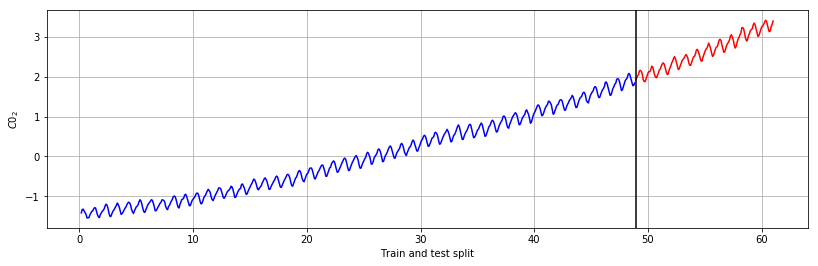

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### BEGIN Solution
df = pd.read_csv('data/monthly_co2_mlo.csv',skiprows=[1,2])

CO2_ppm = df['CO2 [ppm]']
index = df.year-1958
index = index.drop(CO2_ppm[CO2_ppm == -99.99].index)
CO2_ppm.replace(to_replace=-99.99,value=np.nan,inplace=True)
CO2_ppm.dropna(inplace=True)


# train_n, test_n = train_test_split(CO2, test_size=0.225, random_state = 100, shuffle=False)
train, test = train_test_split(CO2_ppm, test_size=0.2, random_state = 42, shuffle=False)
index_train = index[:train.shape[0]]
index_test = index[train.shape[0]:]

scaler = StandardScaler()
train_tr = scaler.fit_transform(train.values.reshape(-1,1))
test_tr = scaler.transform(test.values.reshape(-1, 1))

test_tr_n = pd.Series(test_tr.ravel(), index = index_test)
train_tr_n = pd.Series(train_tr.ravel(), index = index_train)

fig = plt.figure(figsize=(30,4))
ax0 = fig.add_subplot(121)
ax0.plot(index_train, train_tr, color='b')
ax0.plot(index_test, test_tr, color='r')
ax0.axvline(index_test.values[0], c='k')
ax0.grid()
ax0.set_ylabel(r"$C0_2$")
ax0.set_xlabel("Train and test split")
### END Solution

<br>

### Task 4.2 (2 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

1. Plot mean and confidence interval of the prediction. 
2. Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
3. Estimate the prediction error with `r2_score`. R2-score accepted > 0.83 on test sample.

In [46]:
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from sklearn.metrics import r2_score

In [47]:
def plot_model(model, xlim=None):
    if xlim is None:
        xmin = np.min(model.X)
        xmax = np.max(model.X)
        x_range = xmax - xmin
        xlim = [xmin - 0.05 * x_range,
                xmax + 0.05 * x_range]
    
    x = np.linspace(xlim[0], xlim[1], 200).reshape(-1, 1)
    prediction, variance = model.predict(x)
    std = np.sqrt(variance).ravel()
    prediction = prediction.ravel()
    
    
    plt.figure(figsize = (12,8))
    
    plt.plot(model.X, model.Y, 'xk', label='Train data')
    plt.plot(x, prediction, label='Prediction')
    plt.fill_between(x.ravel(), prediction - 2*std,
                     prediction + 2*std, alpha=0.3, label='confidence')
    
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend()

In [48]:
kernel = Poly(1, order=2) + StdPeriodic(1)
# choose this kernel from periodic and nonliner character of data

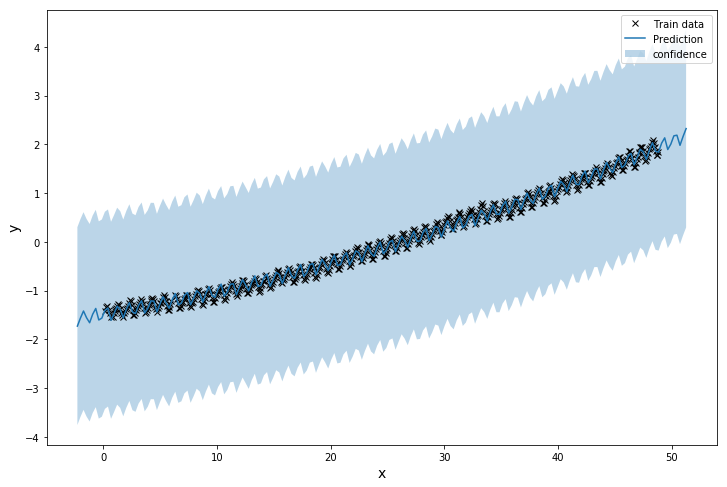

In [49]:
model = GPRegression(index_train.values.reshape(-1, 1), train_tr.reshape(-1, 1), kernel)
pred = model.predict(index_test.values.reshape(-1, 1))[0]
plot_model(model)

Text(0.5,0,'True value')

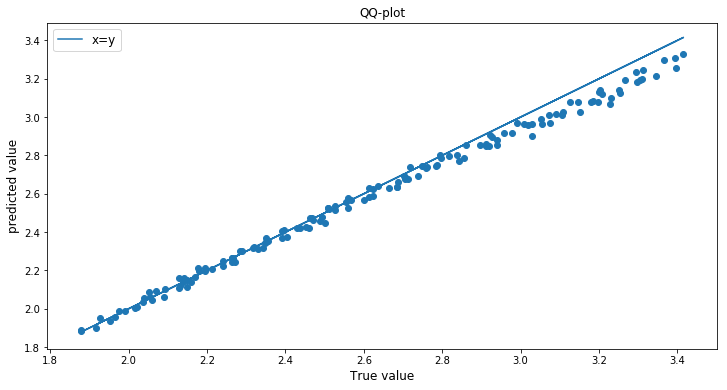

In [50]:
plt.figure(figsize=(12,6))
plt.plot(test_tr,test_tr,label='x=y')
plt.scatter(test_tr,pred)
plt.title('QQ-plot', fontsize=12)
plt.legend(fontsize=12)
plt.ylabel('predicted value',fontsize=12)
plt.xlabel('True value',fontsize=12)

In [42]:
r2_score(test_tr, pred)

0.9840397044996732